## Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


## Dataset Loading

In [38]:
train = pd.read_csv(r'D:\Project Phase II\Dataset\finaltrain.csv',encoding='cp1252')
test = pd.read_csv(r'D:\Project Phase II\Dataset\finaltest.csv',encoding='cp1252')

C:\Users\sathi\AppData\Local\Temp\ipykernel_5004\2025491202.py:1: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r'D:\Project Phase II\Dataset\finaltrain.csv',encoding='cp1252')
C:\Users\sathi\AppData\Local\Temp\ipykernel_5004\2025491202.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(r'D:\Project Phase II\Dataset\finaltest.csv',encoding='cp1252')


In [5]:
authortest = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_testing-set.csv',encoding='cp1252')

## Dataset preprocessing

In [39]:
todrop = ['sloss', 'dloss','stcpb', 'dtcpb', 'trans_depth', 'Stime', 'Ltime','ct_flw_http_mthd', 
        'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
        'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat']
        
reducedTrain = train.drop(todrop, axis = 1)
reducedTest = test.drop(todrop, axis = 1)
reducedTrain = reducedTrain.drop_duplicates()
reducedTest = reducedTest.drop_duplicates()

In [40]:
trainAttributes = reducedTrain.drop(['srcip','sport','dstip','dsport','Label'], axis = 1)
trainLabel = reducedTrain['Label']
testAttributes = reducedTest.drop(['srcip','sport','dstip','dsport','Label'], axis = 1)
testLabel = reducedTest['Label']

In [41]:
train = reducedTrain
test = reducedTest

In [31]:
train

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,res_bdy_len,Sjit,Djit,Sintpkt,Dintpkt,tcprtt,synack,ackdat,ct_state_ttl,Label
0,59.166.0.1,26495,149.171.126.9,23032,-0.636235,0.403367,-0.061502,-0.014677,0.114166,-0.239593,...,-0.098961,-0.119498,-0.251895,-0.075872,-0.075372,-0.130405,-0.117215,-0.124095,-0.216295,0
1,59.166.0.3,62105,149.171.126.5,53,1.542748,-1.460296,-0.064778,-0.080205,-0.247056,-0.239593,...,-0.098961,-0.121143,-0.258795,-0.076759,-0.077077,-0.143891,-0.136248,-0.129452,-0.216295,0
2,59.166.0.1,5711,149.171.126.9,6881,-0.636235,-1.460296,-0.023103,0.113273,2.565701,-0.239593,...,-0.098961,-0.112711,-0.236677,-0.073033,-0.072910,-0.131274,-0.118725,-0.124133,-0.216295,0
3,59.166.0.2,14671,149.171.126.2,11270,-0.636235,0.403367,-0.055564,-0.028007,-0.003717,-0.239593,...,-0.098961,-0.115027,-0.233490,-0.073579,-0.070925,-0.130721,-0.117602,-0.124285,-0.216295,0
4,59.166.0.4,2036,149.171.126.2,53,1.542748,-1.460296,-0.064776,-0.080238,-0.247068,-0.239593,...,-0.098961,-0.121143,-0.258795,-0.076740,-0.077069,-0.143891,-0.136248,-0.129452,-0.216295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80999,175.45.176.2,58571,149.171.126.14,21,-0.636235,0.403367,-0.024239,-0.049828,-0.243891,4.396413,...,-0.098961,-0.015056,-0.246947,-0.017847,0.056042,0.976582,0.518506,1.318078,2.159475,1
81000,175.45.176.3,52396,149.171.126.14,80,-0.636235,0.403367,0.217028,-0.069407,-0.184146,0.404874,...,-0.006238,1.153400,4.011292,0.513373,0.618879,2.972805,2.147312,3.396784,2.159475,1
81001,175.45.176.0,34209,149.171.126.16,5060,1.542748,3.198861,-0.064892,-0.059762,-0.248018,4.396413,...,-0.098961,-0.121143,-0.258795,-0.076736,-0.077106,-0.143891,-0.136248,-0.129452,4.535245,1
81002,175.45.176.2,46006,149.171.126.18,80,-0.636235,0.403367,-0.035051,-0.068478,-0.220619,0.404874,...,-0.098961,-0.015458,0.337115,-0.014295,0.042855,1.191116,0.282077,1.986677,2.159475,1


Author's train-test dataset preprocess

In [9]:
le = LabelEncoder()
authortest['proto'] = le.fit_transform(authortest['proto'])
authortest['state'] = le.fit_transform(authortest['state'])
authortest['service'] = le.fit_transform(authortest['service'])

In [10]:
authortodrop = ['ï»¿id','rate', 'attack_cat', 'is_sm_ips_ports', 'sloss', 'dloss', 'stcpb', 'dtcpb', 'trans_depth',
                'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
                'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst']
#Change column names of df
authortest = authortest.rename(columns={'dinpkt':'Dintpkt','djit':'Djit','dload':'Dload','dpkts':'Dpkts','label':'Label','sinpkt':'Sintpkt',
                        'sjit':'Sjit','sload':'Sload', 'spkts':'Spkts','dmean':'dmeansz','response_body_len':'res_bdy_len', 'smean':'smeansz'})
authortest = authortest.drop(authortodrop,axis = 1)
authortest = authortest.drop_duplicates()
authortestAttributes = authortest[trainAttributes.columns]
authortestLabel = authortest['Label']

## Find best dimension for PCA

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Best n value:  7
Variance Ratio: [9.99480578e-01 5.15418833e-04 1.96223365e-06 1.87098832e-06
 1.24629337e-07 4.48032356e-08 3.44039133e-10]

Second Best n value:  18
Variance Ratio: [9.99480578e-01 5.15418833e-04 1.96223365e-06 1.87098832e-06
 1.24629337e-07 4.48032356e-08 3.44039133e-10 6.71098399e-11
 8.64488787e-12 2.53224963e-12 1.75036884e-12 6.40235312e-13
 2.78614539e-13 9.87091134e-14 3.99781277e-14 8.67243724e-15
 1.13198579e-15 3.95815015e-16]


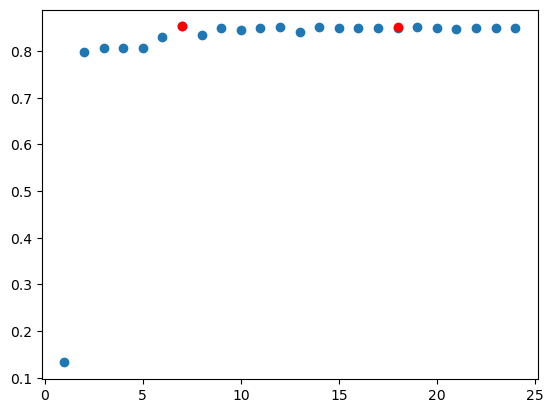

In [18]:
from sklearn.decomposition import PCA
pca_n = []
pca_n_f1 = []
pca_attr = []
for i in range(1,25):
    pca = PCA(n_components = i)
    pca_x_train = pca.fit_transform(trainAttributes)
    pca_x_test = pca.fit_transform(testAttributes)
    pca_attr.append(pca.explained_variance_ratio_)
    # # explained_variance = pca.explained_variance_ratio_
    # print(explained_variance)
    classifier = LogisticRegression()
    classifier.fit(pca_x_train, trainLabel)
    classifier_pred = classifier.predict(pca_x_test)
    pca_n.append(i)
    pca_n_f1.append(f1_score(testLabel,classifier_pred))
    

plt.scatter(x=pca_n, y=pca_n_f1)

best_pca_n = pca_n_f1.index(max(pca_n_f1)) + 1
print('\nBest n value: ',best_pca_n)
print('Variance Ratio:',pca_attr[best_pca_n - 1])
plt.scatter(x=best_pca_n, y=pca_n_f1[best_pca_n - 1], color='red')
pca_n_f1.pop(best_pca_n -1)
sbest_pca_n = pca_n_f1.index(max(pca_n_f1)) + 1
print('\nSecond Best n value: ',sbest_pca_n)
print('Variance Ratio:',pca_attr[sbest_pca_n - 1])
plt.scatter(x=sbest_pca_n, y=pca_n_f1[sbest_pca_n - 1], color='red')
plt.show()

## SVD 


Best n value:  13


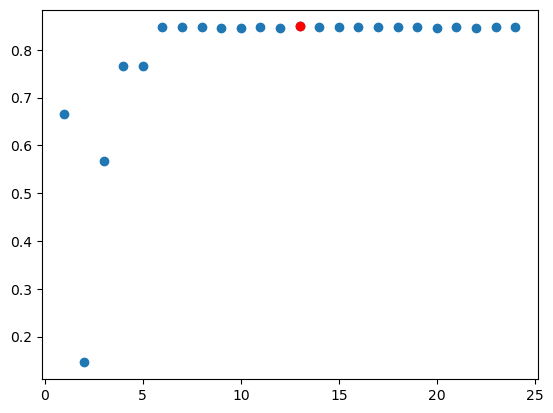

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

svd_n = []
svd_n_f1 = []
for i in range(1,25):
    steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
    pipeline_model = Pipeline(steps=steps)
    cv_res = cross_validate(estimator=pipeline_model,X=trainAttributes,y=trainLabel,n_jobs=-1,cv=10,scoring = 'accuracy',return_train_score = True)
    y_pred = cross_val_predict(estimator=pipeline_model,X=testAttributes,y=testLabel,n_jobs=-1,cv=10)
    svd_n_f1.append(f1_score(testLabel,y_pred))
    svd_n.append(i)

plt.scatter(x=svd_n, y=svd_n_f1)

best_svd_n = svd_n_f1.index(max(svd_n_f1)) + 1
print('\nBest n value: ',best_svd_n)
plt.scatter(x=best_svd_n, y=svd_n_f1[best_svd_n - 1], color='red')
plt.show()

## LDA

Note: LDA can take in upto a maximum of (unique number of classes -1 )in the target variable


Best n value:  1
Variance Ratio: [1.]


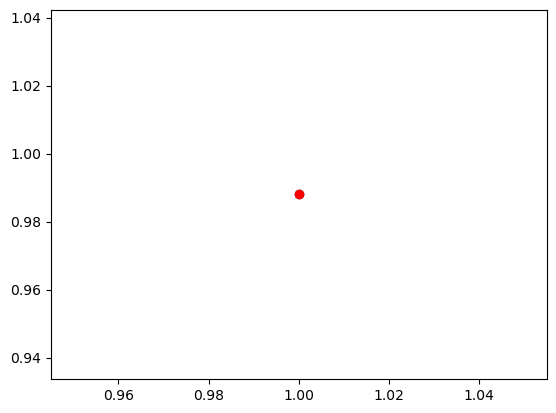

F1 score:  0.987965358227421


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_n = []
lda_n_f1 = []
lda_attr = []
for i in range(1,2):
    lda = LinearDiscriminantAnalysis(n_components = i)
    lda_x_train = lda.fit_transform(trainAttributes, trainLabel)
    lda_x_test = lda.transform(testAttributes)
    lda_attr.append(lda.explained_variance_ratio_)
    # # explained_variance = pca.explained_variance_ratio_
    # print(explained_variance)
    classifier = LogisticRegression()
    classifier.fit(lda_x_train, trainLabel)
    classifier_pred = classifier.predict(lda_x_test)
    lda_n.append(i)
    lda_n_f1.append(f1_score(testLabel,classifier_pred))
    

plt.scatter(x=lda_n, y=lda_n_f1)

best_lda_n = lda_n_f1.index(max(lda_n_f1)) + 1
print('\nBest n value: ',best_lda_n)
print('Variance Ratio:',lda_attr[best_lda_n - 1])
plt.scatter(x=best_lda_n, y=lda_n_f1[best_lda_n - 1], color='red')
lda_n_f1.pop(best_lda_n -1)
plt.show()
print('F1 score: ',f1_score(testLabel,classifier_pred))

## Test PCA and LDA scores

Use PCA to reduce 25 into 7 dimensions. Then LDA will reduce it to 1. Note: Simply using LDA to map them from 25 attributes to 1 attribute is more effective. Skipping PCA can be considered.

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
pca_x_train = pca.fit_transform(trainAttributes)
pca_x_test = pca.fit_transform(authortestAttributes)


In [50]:
pca_x_train = trainAttributes
pca_x_test = authortestAttributes

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)
lda_x_train = lda.fit_transform(pca_x_train, trainLabel)
lda_x_test = lda.transform(pca_x_test)


In [58]:
# List of classifiers to include
import sklearn
import xgboost
import lightgbm
import sklearn.discriminant_analysis
from lazypredict.Supervised import LazyClassifier

#Skip SVM
classifiers = [
 ('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LinearDiscriminantAnalysis',  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('Perceptron', sklearn.linear_model._perceptron.Perceptron),
 ('QuadraticDiscriminantAnalysis',  sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis),
 ('RandomForestClassifier', sklearn.ensemble._forest.RandomForestClassifier),
 ('StackingClassifier', sklearn.ensemble._stacking.StackingClassifier),
 ('XGBClassifier', xgboost.sklearn.XGBClassifier),
 ('LGBMClassifier', lightgbm.sklearn.LGBMClassifier)]
clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None,classifiers=classifiers,predictions=True)


In [59]:
#train models using clf 
models,predictions = clf.fit(lda_x_train, lda_x_test, trainLabel, authortestLabel)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  7%|▋         | 1/15 [00:02<00:29,  2.09s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6656483951467171, 'Balanced Accuracy': 0.5172628461451693, 'ROC AUC': 0.5172628461451693, 'F1 Score': 0.5663958832197289, 'Time taken': 2.0860018730163574}


 13%|█▎        | 2/15 [00:04<00:28,  2.18s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.5607090611823423, 'Balanced Accuracy': 0.5704318841762752, 'ROC AUC': 0.5704318841762752, 'F1 Score': 0.5728474195137573, 'Time taken': 2.252000331878662}
{'Model': 'BernoulliNB', 'Accuracy': 0.470054212202048, 'Balanced Accuracy': 0.5953712600071269, 'ROC AUC': 0.5953712600071269, 'F1 Score': 0.41758805349760697, 'Time taken': 0.05899548530578613}


 27%|██▋       | 4/15 [00:04<00:10,  1.07it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.5538895103691592, 'Balanced Accuracy': 0.5698149469218265, 'ROC AUC': 0.5698149469218265, 'F1 Score': 0.5658675225381268, 'Time taken': 0.33400535583496094}
{'Model': 'DummyClassifier', 'Accuracy': 0.6642715773169262, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.5302701006797149, 'Time taken': 0.032001495361328125}
{'Model': 'GaussianNB', 'Accuracy': 0.456952930040444, 'Balanced Accuracy': 0.5838935575415518, 'ROC AUC': 0.5838935575415518, 'F1 Score': 0.39951845846269873, 'Time taken': 0.03999781608581543}


 60%|██████    | 9/15 [00:07<00:03,  1.79it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.557976938301351, 'Balanced Accuracy': 0.5940620952925768, 'ROC AUC': 0.5940620952925768, 'F1 Score': 0.5672184986436126, 'Time taken': 2.0960004329681396}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.470054212202048, 'Balanced Accuracy': 0.5953712600071269, 'ROC AUC': 0.5953712600071269, 'F1 Score': 0.41758805349760697, 'Time taken': 0.0639955997467041}
{'Model': 'LogisticRegression', 'Accuracy': 0.6768565527923587, 'Balanced Accuracy': 0.5384079263974604, 'ROC AUC': 0.5384079263974604, 'F1 Score': 0.5956294100296551, 'Time taken': 0.10900115966796875}


 67%|██████▋   | 10/15 [00:07<00:02,  2.14it/s]

{'Model': 'Perceptron', 'Accuracy': 0.470054212202048, 'Balanced Accuracy': 0.5953712600071269, 'ROC AUC': 0.5953712600071269, 'F1 Score': 0.41758805349760697, 'Time taken': 0.10899662971496582}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.456952930040444, 'Balanced Accuracy': 0.5838935575415518, 'ROC AUC': 0.5838935575415518, 'F1 Score': 0.39951845846269873, 'Time taken': 0.07100081443786621}


 80%|████████  | 12/15 [00:34<00:15,  5.26s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.5537389209190259, 'Balanced Accuracy': 0.5697332900131905, 'ROC AUC': 0.5697332900131905, 'F1 Score': 0.565714650671581, 'Time taken': 27.088001251220703}


 93%|█████████▎| 14/15 [00:34<00:03,  3.54s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.552985973668359, 'Balanced Accuracy': 0.6199536169501123, 'ROC AUC': 0.6199536169501124, 'F1 Score': 0.5529638474524323, 'Time taken': 0.4760005474090576}
[LightGBM] [Info] Number of positive: 41231, number of negative: 41231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 82462, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 15/15 [00:35<00:00,  2.37s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.5523405903106445, 'Balanced Accuracy': 0.6204186062387363, 'ROC AUC': 0.6204186062387365, 'F1 Score': 0.5518387296911385, 'Time taken': 0.654998779296875}


In [60]:
from sklearn.metrics import roc_auc_score
for model in predictions.columns:
    print(model)
    print(classification_report(authortestLabel, predictions[model]))
    auc_scores = roc_auc_score(authortestLabel, predictions[model], multi_class='ovr')  # Or multi_class='ovo' for one-vs-one
    print("AUC Scores for each class:", auc_scores)
    print('-----------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------')

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     30878
           1       0.52      0.07      0.12     15606

    accuracy                           0.67     46484
   macro avg       0.59      0.52      0.46     46484
weighted avg       0.62      0.67      0.57     46484

AUC Scores for each class: 0.5172628461451693
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       0.73      0.54      0.62     30878
           1       0.40      0.60      0.48     15606

    accuracy                           0.56     46484
   macro avg       0.56      0.57      0.55     46484
weighted avg       0.62      0.56      0.57     46484

AUC Scores for each class: 0.5704318841762752
-------------------------------------------------

## Dimensionality Reduction Using LDA (25 dimensions to 1)

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)
lda_x_train = lda.fit_transform(trainAttributes, trainLabel)
lda_x_test = lda.transform(testAttributes)